# EDA (Exploratory Data Analysis)

Segmento dedicado a evaluar la calidad de la informacion proporcionada y mirar:

- Numero de registros
- Tipo de datos
- Estado de la informacion, outliners, missing data, balance
- Caracteristicas importantes, sesgos en entre otros

Ajustar la ruta de ejecucion local dado por la distribucion de carpetas locales

In [1]:
import os
from pathlib import Path

print("Actual path: ", os.getcwd())
os.chdir("..")
print("New path: ", os.getcwd())

Actual path:  /home/bdebian/Documents/Projects/tecnical_test_mvm/src/notebooks
New path:  /home/bdebian/Documents/Projects/tecnical_test_mvm/src


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import shapiro
from sklearn.impute import SimpleImputer

sns.set_context("notebook")

Descargar y almacenar los datos en memoria en formato parquet, por su almacenamiento en columnas, en lugar de filas, dada la cantidad de columnas que tiene la informacion 

In [3]:
save_path = Path("data").joinpath("wine").with_suffix(".parquet")

if not save_path.is_file():

    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
    data = pd.read_csv(url,header=None)

    #save data to parquet extencion
    data.to_parquet(save_path)
else: 
    columns = [
        "class",
        "Alcohol",
        "Malic acid",
        "Ash",
        "Alcalinity of ash",
        "Magnesium",
        "Total phenols",
        "Flavanoids",
        "Nonflavanoid phenols",
        "Proanthocyanins",
        "Color intensity",
        "Hue",
        "OD280/OD315 of diluted wines",
        "Proline",
    ]
    data = pd.read_parquet(save_path)
    data.rename(columns=dict(zip(data.columns.values, columns)), inplace=True)

### Visualizacion General de la informacion

Se Presenta una base de datos conocida como *1. Título de la base de datos: Datos de reconocimiento de vinos Actualizado el 21 de septiembre de 1998 por C. Blake: Se agregó información sobre atributos*

Fuente: \
(a) Forina, M. et al, PARVUS: un paquete extensible para exploración, clasificación y correlación de datos. Instituto de Análisis y Tecnologías Farmacéuticas y Alimentarias, Via Brigata Salerno,16147 Génova, Italia.\
(b) Stefan Aeberhard, correo electrónico: stefan@coral.cs.jcu.edu.au \
(c) julio de 1991

In [4]:
display(data.describe())
display(data.dtypes)

class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

Lo anterior se hace para ver una primera impresión de los datos, identificando el número de variables, rangos de cada una y descripción estadística básica generalizada sobre los datos crudos, en el siguiente recuadro se ve a priori los tipos de datos, en esta caso numéricos y se aprecia que no se tiene variables categóricas en el sondeo inicial

### Analisis de correlacion

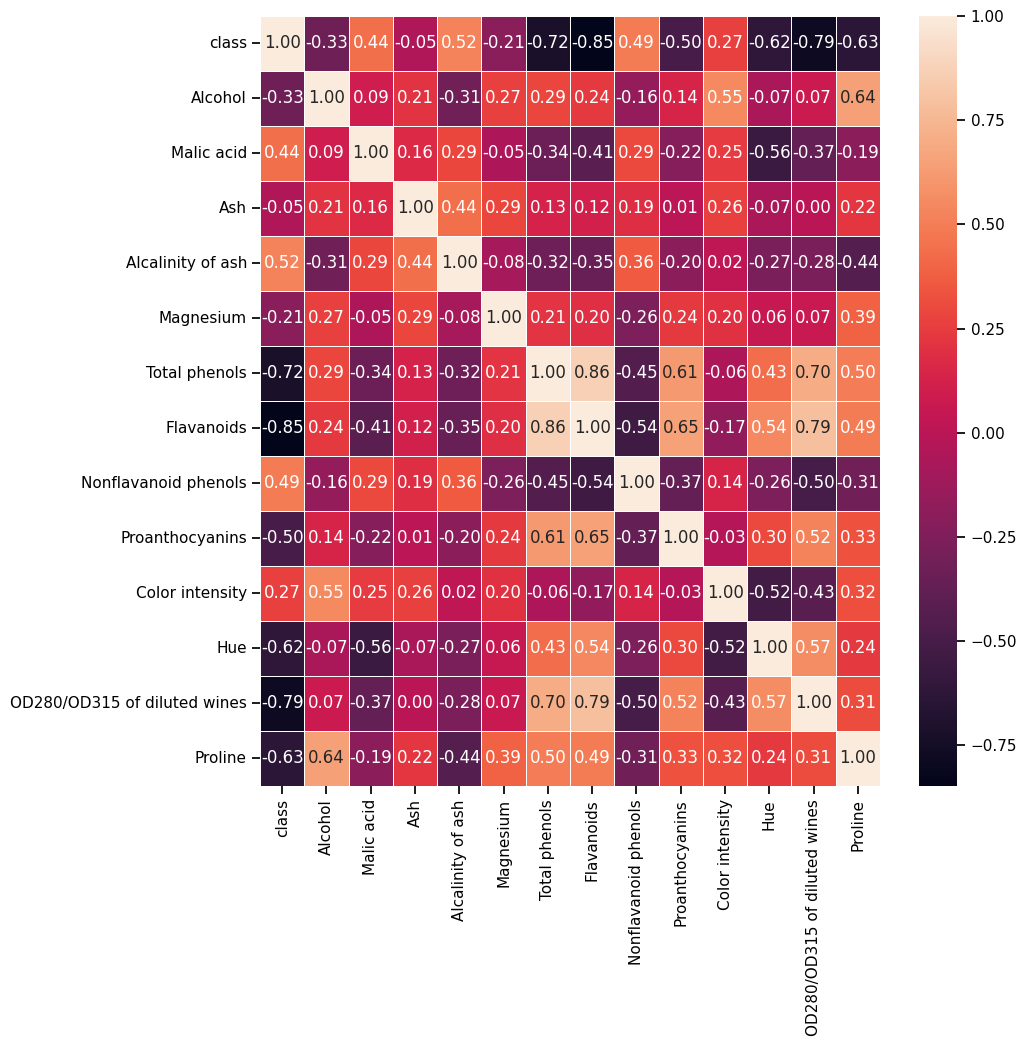

In [5]:
data.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, fmt=".2f", ax=ax)
plt.show()

En base a la imagen anterior:

- Correlaciones positivas fuertes: Hay varias variables que presentan una correlación positiva fuerte entre sí. Por ejemplo, "__Total phenols__" y "__Flavanoids__" tienen una correlación muy alta, lo que sugiere que estas dos características están estrechamente relacionadas en los datos.

- Correlaciones negativas fuertes: También hay algunas correlaciones negativas fuertes, como entre "__Alcohol__" y "__OD280/OD315 of diluted wines__". Esto indica que a medida que aumenta el contenido de alcohol, el valor de __OD280/OD315__ tiende a disminuir.

- Ausencia de correlación: Algunas variables no muestran una correlación significativa entre sí, lo que se representa por valores cercanos a 0 en la matriz.

- Grupos de variables correlacionadas: Podemos observar grupos de variables que están altamente correlacionadas entre sí. Estos grupos podrían indicar la existencia de factores subyacentes que influyen en múltiples variables.

A priori se ve que hay relaciones causales, pero no necesariamente esto implica causalidad entre las variables

Visualizacion de rapida de los datos y patrones y relaciones y posibles outliners

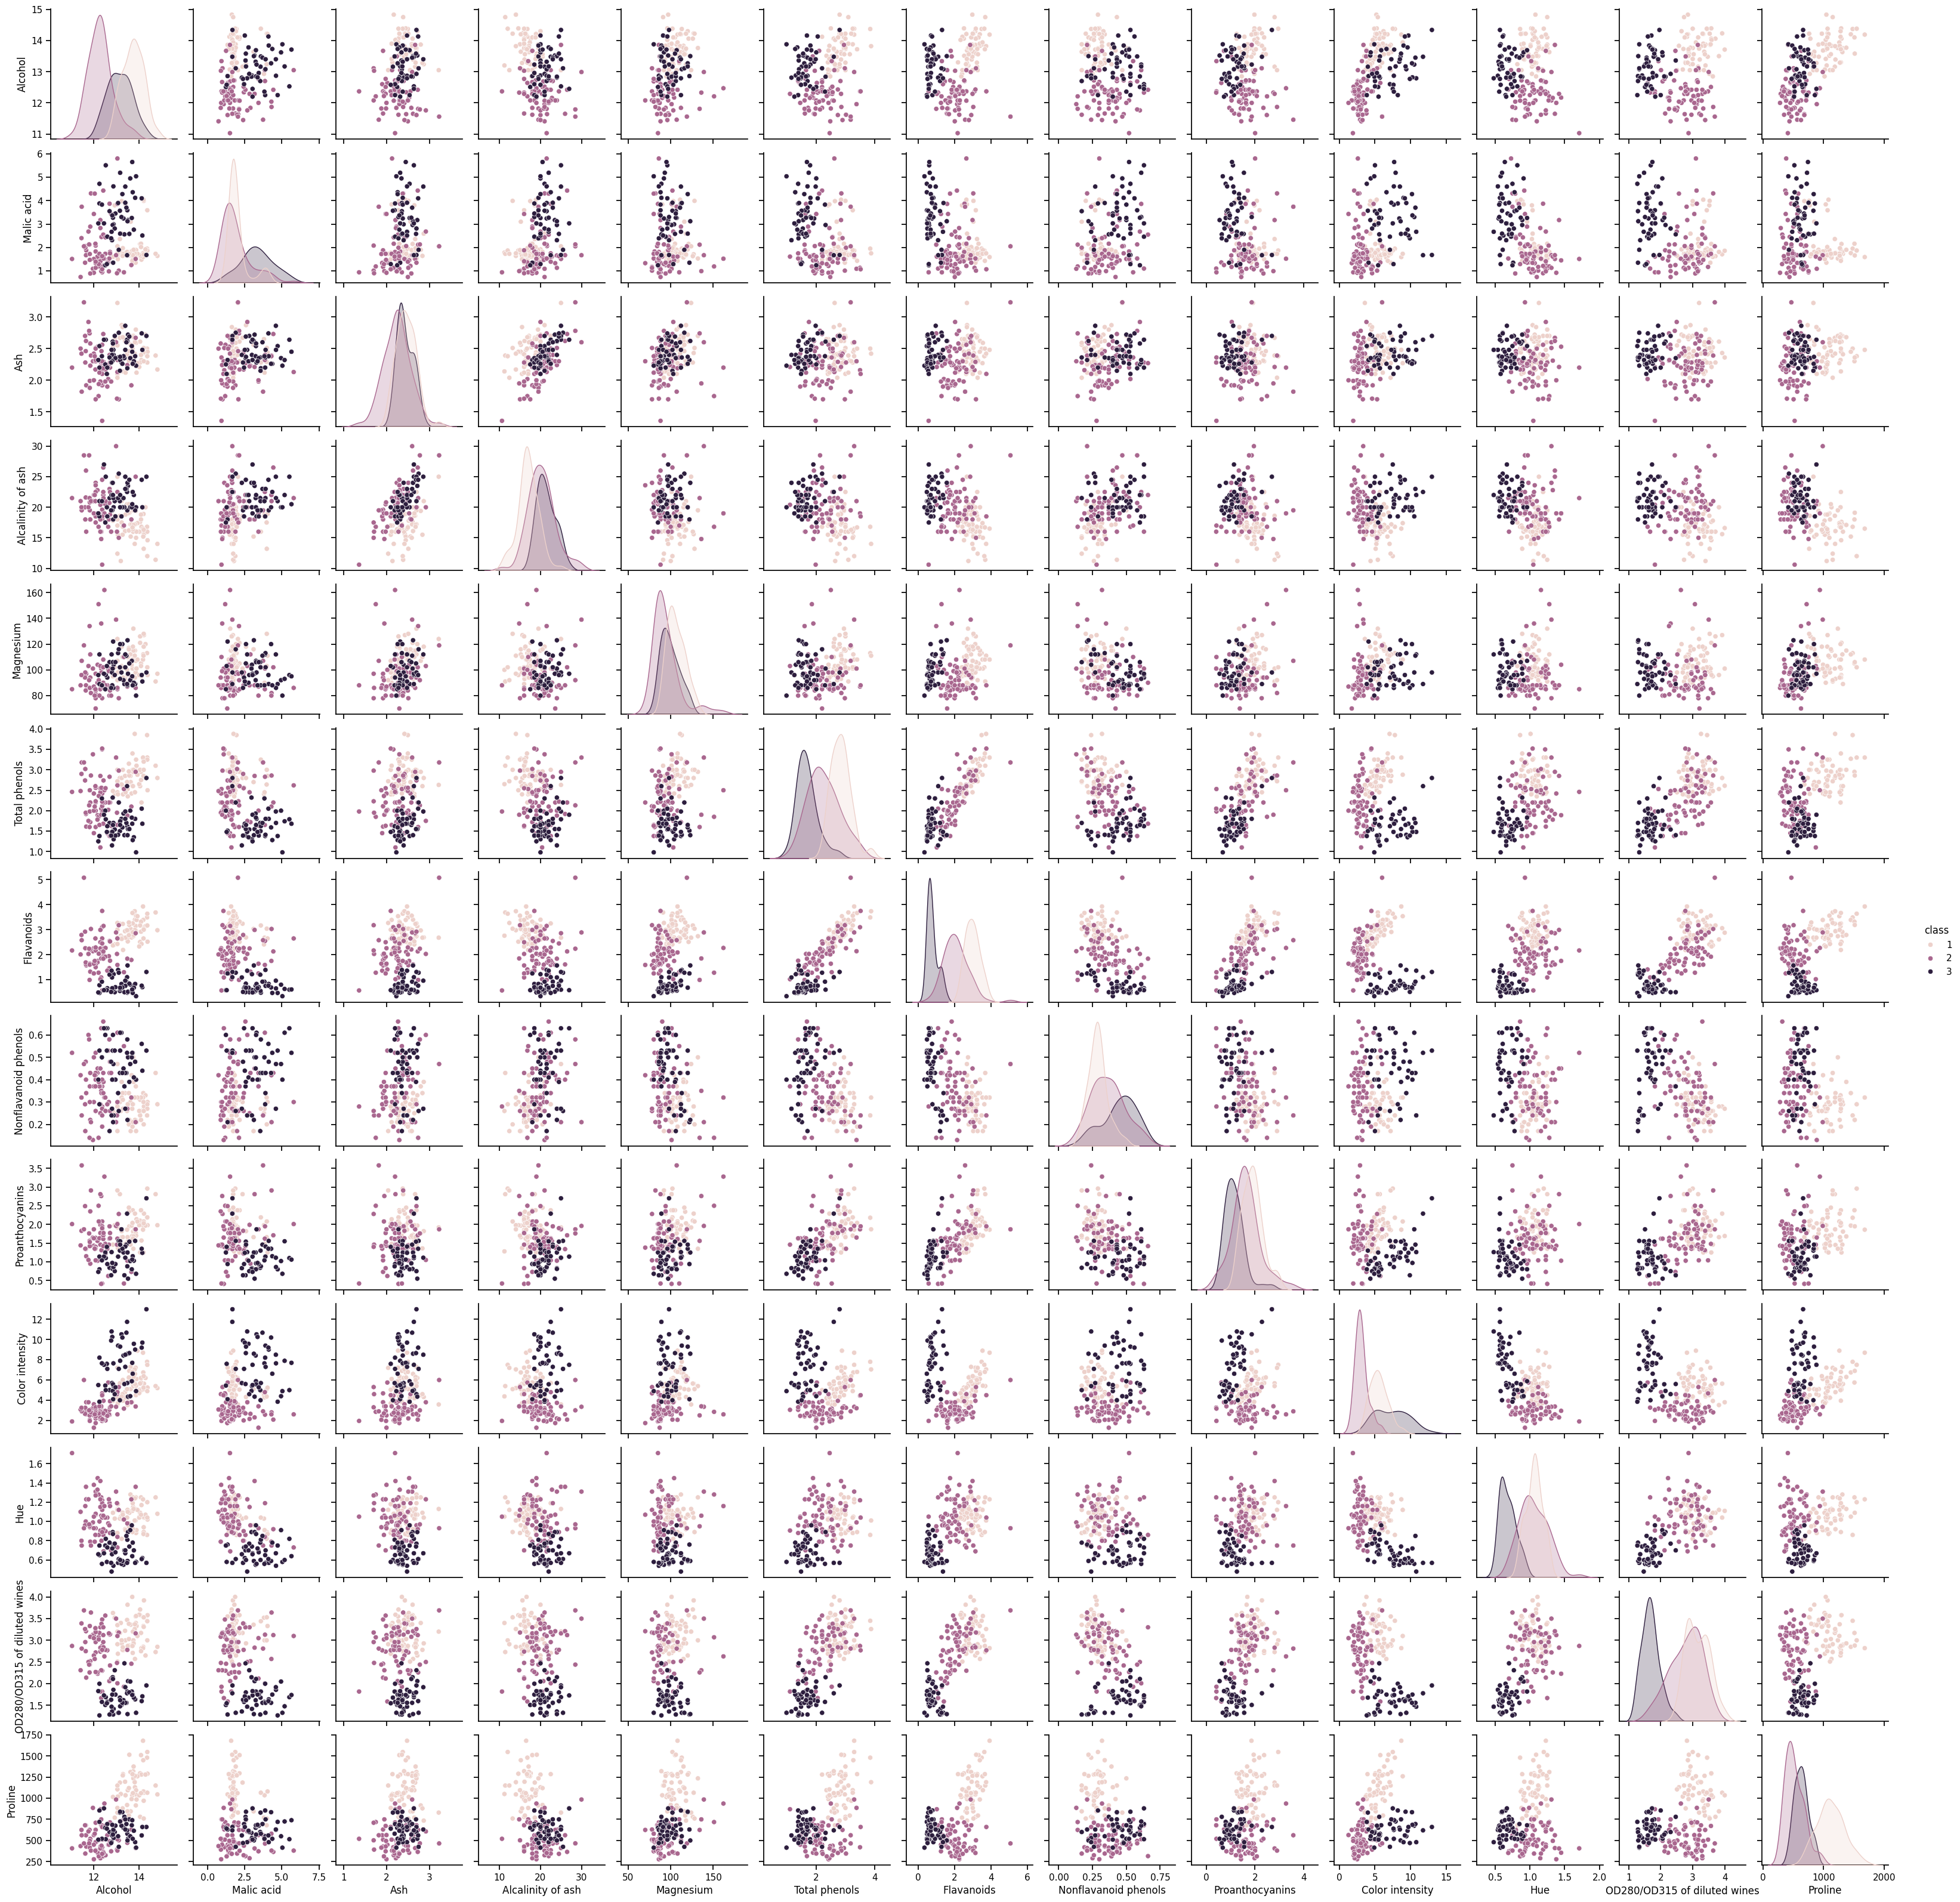

In [6]:
g = sns.pairplot(data, hue="class")

Visualizamos la distribucion de los datos de manera grafica

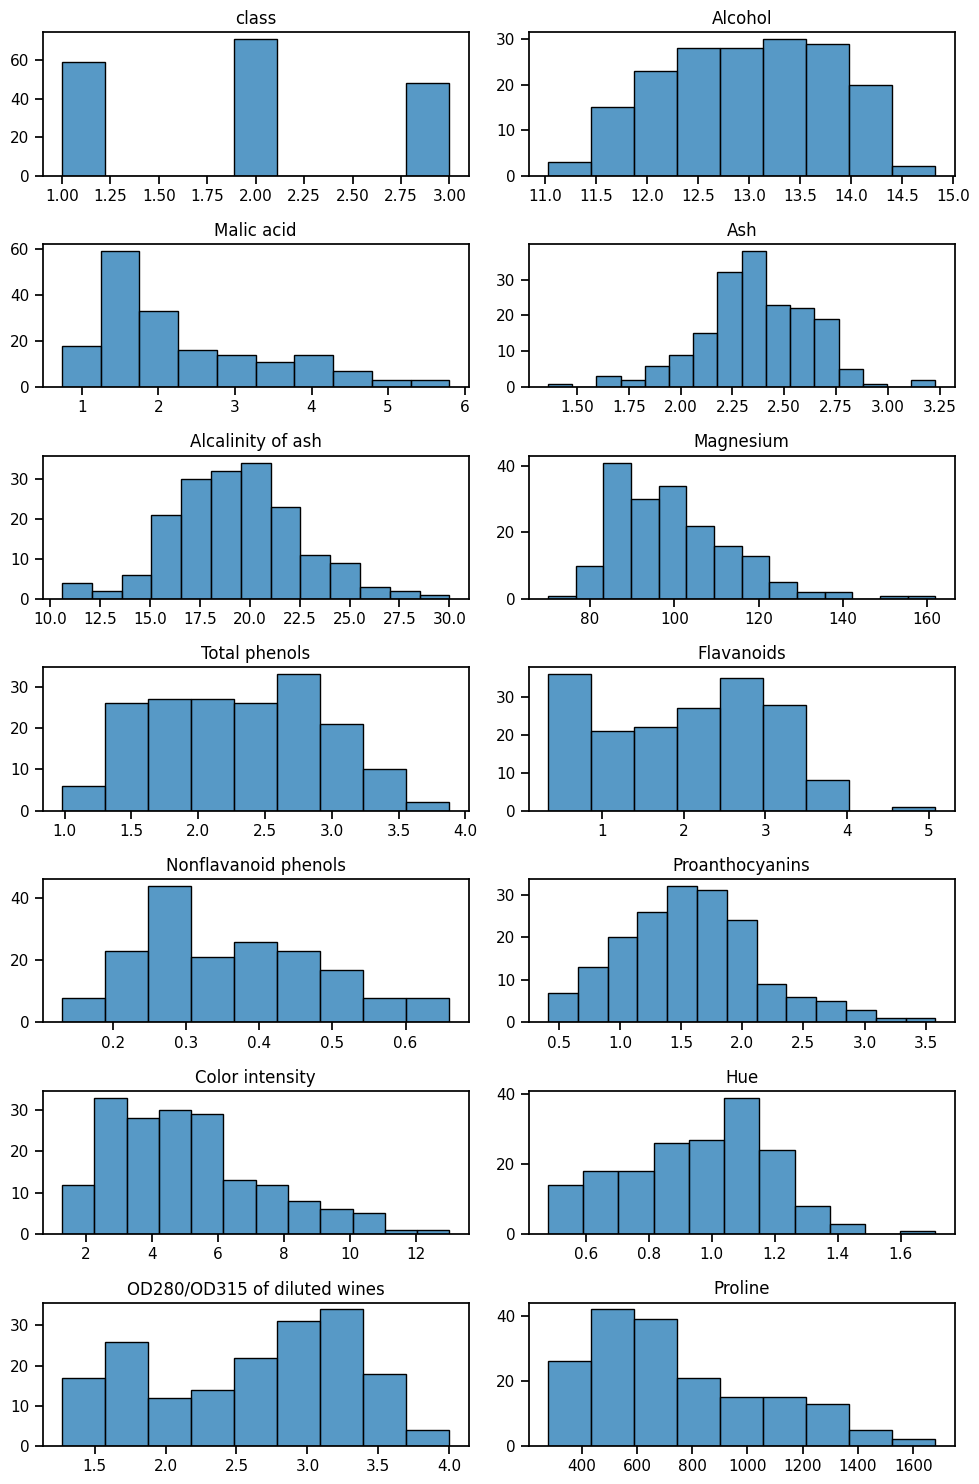

In [7]:
ncols = data.shape[1]
nrows = int(ncols / 2)
# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(10, 15))

i = 0 
for col in data.columns:
    row = i // 2
    j = i % 2

    sns.histplot(data[col], ax=axes[row, j])
    axes[row, j].set_title(col)
    axes[row, j].set_xlabel("")
    axes[row, j].set_ylabel("")
    i += 1
plt.tight_layout()
plt.show()


Ejecutamos el analisis de Shapir-wilk dada la cantidad de datos, ya que es una muestra relativamente pequena de datos

In [8]:
for column in data.columns:
    stat, p = shapiro(data[column])
    print(f"Columna: {column}")
    print(f"Estadístico: {stat}, p-valor: {p}")

    if p > 0.05:
        print("Los datos parecen tener una distribución normal (no se rechaza H0)\n")
    else:
        print("Los datos NO tienen una distribución normal (se rechaza H0)\n")


Columna: class
Estadístico: 0.8042114001003196, p-valor: 3.526579783311251e-14
Los datos NO tienen una distribución normal (se rechaza H0)

Columna: Alcohol
Estadístico: 0.9818041416927711, p-valor: 0.020047981728854945
Los datos NO tienen una distribución normal (se rechaza H0)

Columna: Malic acid
Estadístico: 0.8887839752895415, p-valor: 2.945800703600761e-10
Los datos NO tienen una distribución normal (se rechaza H0)

Columna: Ash
Estadístico: 0.9839469382497583, p-valor: 0.0386827755407432
Los datos NO tienen una distribución normal (se rechaza H0)

Columna: Alcalinity of ash
Estadístico: 0.9902253552856983, p-valor: 0.263868844753376
Los datos parecen tener una distribución normal (no se rechaza H0)

Columna: Magnesium
Estadístico: 0.9383312109016513, p-valor: 6.345693783266514e-07
Los datos NO tienen una distribución normal (se rechaza H0)

Columna: Total phenols
Estadístico: 0.9766817428672644, p-valor: 0.004395305154289821
Los datos NO tienen una distribución normal (se rechaz

In [9]:
features = [
        "Alcohol",
        "Malic acid",
        "Ash",
        "Alcalinity of ash",
        "Magnesium",
        "Total phenols",
        "Flavanoids",
        "Nonflavanoid phenols",
        "Proanthocyanins",
        "Color intensity",
        "Hue",
        "OD280/OD315 of diluted wines",
        "Proline",
]

target = [
    "class"
]
X = data[features]
y = data[target]


### Reduccion dimensional
Se omite hacer reduccion dimencional sea:
- LDA (Linear Discriminant Analysis,)
- PCA (Principal Component Analysis)
- SVD(Singular Value Decomposition)

 dada la solicitud de entradas del modelo y los valores de prueba que requieren 13 variables de entrada

```python
   - [13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285] 
   - [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]
```

### Evaluar datos con valores unicos 

Se verifica las columnas que tienen un único valor para todas las filas no contienen ninguna información para el modelado.

Dependiendo de la elección de los algoritmos de preparación de datos y modelado, las variables con un único valor también pueden provocar errores o resultados inesperados.

In [10]:
data.nunique()

class                             3
Alcohol                         126
Malic acid                      133
Ash                              79
Alcalinity of ash                63
Magnesium                        53
Total phenols                    97
Flavanoids                      132
Nonflavanoid phenols             39
Proanthocyanins                 101
Color intensity                 132
Hue                              78
OD280/OD315 of diluted wines    122
Proline                         121
dtype: int64

Al ejecutar la funcion Siguiente, se informa el índice de columna y la cantidad de valores únicos para cada columna, seguido del porcentaje de valores únicos de todas las filas del conjunto de datos. Aquí, podemos ver que algunas columnas tienen un porcentaje mayor al 22%  de valores únicos. se omite la primera columna dado que es la salida del modelo.

In [11]:
for i in range(data.shape[1]):
    num = len(np.unique(data.iloc[:, i]))
    percentage = float(num) / data.shape[0] * 100
    if percentage > 1:
        print(f"{i}, {num}, {np.round(percentage)}%")

0, 3, 2.0%
1, 126, 71.0%
2, 133, 75.0%
3, 79, 44.0%
4, 63, 35.0%
5, 53, 30.0%
6, 97, 54.0%
7, 132, 74.0%
8, 39, 22.0%
9, 101, 57.0%
10, 132, 74.0%
11, 78, 44.0%
12, 122, 69.0%
13, 121, 68.0%


Al ver los resultados anteriores, podemos aprecias que se descartan ciertas valoraciones sobre hipostesis de la informacion como lo pueden ser:

- ¿Quizás los valores únicos se puedan codificar como valores ordinales?
- ¿Quizás los valores únicos se puedan codificar como valores categóricos?

### Identificacion de Datos duplicados
Se evalua la posiblidad de filas que contienen datos idénticos podrían resultar inútiles para el proceso de modelado y, además, peligrosamente engañosas durante la evaluación del modelo.

In [12]:
dups = data.duplicated()

display(dups.any())
display(data[dups])

False

Empty DataFrame
Columns: [class, Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline]
Index: []

Al evaluar los valores duplicados por filas no se aprecian valores duplicados

### Identificacion de datos anomalos

Utilizando métodos estadísticos para identificar observaciones que parecen raraso improbables dados los datos disponibles.

Verifique los valores atípicos para cada característica con respecto al valor de salida

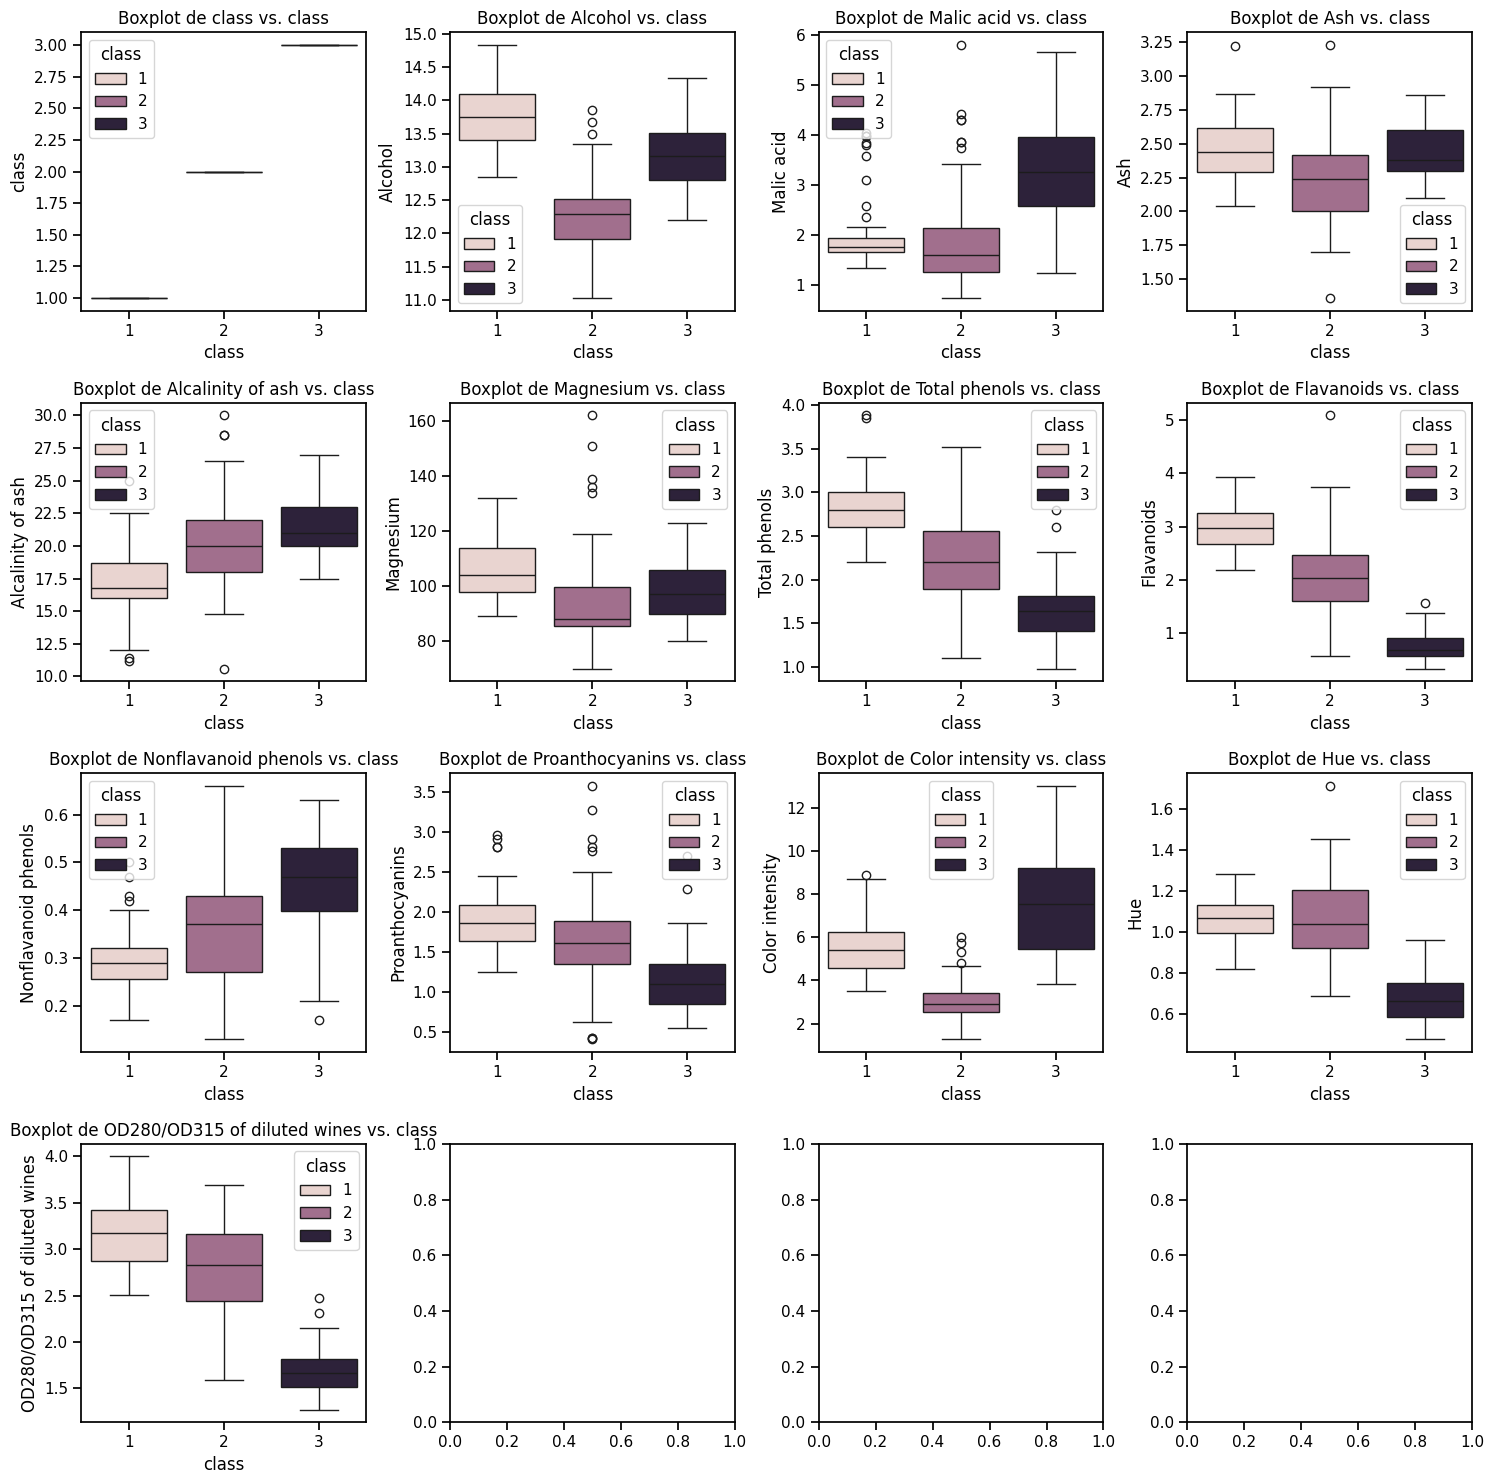

In [13]:
num_cols = len(data.columns) - 1
num_rows = int(
    np.ceil(np.sqrt(num_cols))
)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_rows, figsize=(15, 15))
for i, column in enumerate(data.columns[:-1]):
    row = i // num_rows
    col = i % num_rows
    sns.boxplot(x="class", y=column, data=data, ax=axes[row, col], hue="class")
    axes[row, col].set_title(f"Boxplot de {column} vs. class")

plt.tight_layout()
plt.show()

outliers usando meotod de rangos intercuantiles dado el tipo de distribucion de datos del dataset, dado que si presentara otro tipo de distribucion se pudo usar el metodo de la desviacion estandar para outliers o un factor atípico local (LOF)

In [14]:
def remove_outliners(sub_class: pd.DataFrame) -> pd.DataFrame:
    Q1 = sub_class.quantile(0.25)
    Q3 = sub_class.quantile(0.75)
    IQR = Q3 - Q1
    mean_iqr = (Q1 + Q3) / 2
    data_out = sub_class[
        ~((sub_class < (Q1 - 1.5 * IQR)) | (sub_class > (Q3 + 1.5 * IQR)))
    ]
    # data_out.fillna(mean_iqr, inplace=True)
    # data_out.dropna(inplace=True)
    return data_out

Se hace una evaluacion en los cuantiles de 25 y 75 para determinar en todas la columas del dataframe, si existen datos anomalos fuera de estas bandas 

In [30]:
display(f"Dimensiones del dataframe antes de evaluar si existen datos anomalos {data.shape}:")
data_ = remove_outliners(data)

display("Numero de outliers en los cuantiles del 25% y 75% por clase",data_.isna().sum())
data_.dropna(inplace=True)
display(
    f"Dimensiones del dataframe despues de evaluar si existen datos anomalos {data_.shape}:"
)


'Dimensiones del dataframe antes de evaluar si existen datos anomalos (178, 14):'

'Numero de outliers en los cuantiles del 25% y 75% por clase'

class                           0
Alcohol                         0
Malic acid                      3
Ash                             3
Alcalinity of ash               4
Magnesium                       4
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 2
Color intensity                 4
Hue                             1
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

'Dimensiones del dataframe despues de evaluar si existen datos anomalos (161, 14):'

Lo anterior  sugiere que los datos están relativamente bien distribuidos y carecen de valores extremos que podrían distorsionar significativamente su análisis. pero se tomamos la banda del cuantiles del 25% al 75% se encuentran varios datos por fuera del los rangos, lo cual se puede tratar , como se muestra la parte de imputacion de datos mas adelante



### Balance de datos

class
2    71
1    59
3    48
Name: count, dtype: int64

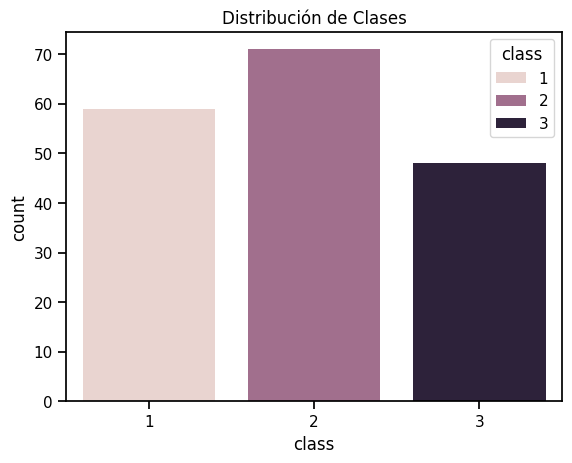

'Procentaje de distribucion de los datos '

class
2    40.0
1    33.0
3    27.0
Name: proportion, dtype: float64

In [31]:
class_distribution = data["class"].value_counts()
display(class_distribution)

sns.countplot(x="class", data=data, hue="class")
plt.title("Distribución de Clases")
plt.show()

class_proportion = data["class"].value_counts(normalize=True)
display("Procentaje de distribucion de los datos ")
display(np.round(class_proportion * 100))


para el escenario se de la distribucion de datos ya se pueden hacer 3 cosas para ajustar los dato al modelo 

__Resampling__: 
- Oversampling (Sobremuestreo): Aumentar el número de instancias de la clase minoritaria replicando o generando nuevas instancias (por ejemplo, usando técnicas como SMOTE).
- Undersampling (Submuestreo): Reducir el número de instancias de la clase mayoritaria para balancear las clases.

__Ajuste de Ponderaciones en el Modelo__: \
Algunos algoritmos de clasificación permiten ajustar las ponderaciones para dar más importancia a las clases minoritarias. Por ejemplo, en sklearn, muchos modelos permiten ajustar el parámetro class_weight='balanced'.

__Usar Métricas Apropiadas__: \
En lugar de utilizar solo la precisión (accuracy), se pueden emplear métricas como la f1-score, recall y AUC-ROC, que son más sensibles al desbalance.

dada la cantidad de datos lo mejor es cambiar por otras metricas para tener una buena cantidad de datos

### Imputacion de datos

A menudo, los datos tienen valores faltantes. Los datos pueden tener valores faltantes por diversas razones, como observaciones que no se registraron y datos corruptos. El manejo de los datos faltantes es importante, ya que muchos algoritmos de ML no admiten datos con valores faltantes.

In [32]:
num_missing = (data_[features] == 0).sum()
display(num_missing)

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

No se observan valores en cero a lo largo del dataframe a lo largo del dataframe inicial, pero cuando decidimo eliminar valores anomalos, se presentan un par de casos

In [33]:
data_ = remove_outliners(data)
data_.isna().sum()

for col in data.columns:
    n_miss = data_[col].isnull().sum()
    perc = n_miss / data_.shape[0] * 100
    print( ' > %d, Missing: %d (%.1f%%) ' % (i, n_miss, perc))

print(data_.isna().sum())

 > 12, Missing: 0 (0.0%) 
 > 12, Missing: 0 (0.0%) 
 > 12, Missing: 3 (1.7%) 
 > 12, Missing: 3 (1.7%) 
 > 12, Missing: 4 (2.2%) 
 > 12, Missing: 4 (2.2%) 
 > 12, Missing: 0 (0.0%) 
 > 12, Missing: 0 (0.0%) 
 > 12, Missing: 0 (0.0%) 
 > 12, Missing: 2 (1.1%) 
 > 12, Missing: 4 (2.2%) 
 > 12, Missing: 1 (0.6%) 
 > 12, Missing: 0 (0.0%) 
 > 12, Missing: 0 (0.0%) 
class                           0
Alcohol                         0
Malic acid                      3
Ash                             3
Alcalinity of ash               4
Magnesium                       4
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 2
Color intensity                 4
Hue                             1
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64


Realizamos una imputacion estadisticia por la media de los datos, ya que los datos tienen, dado el volumen de datos no es recomendable eliminarlos

In [46]:
X = data_[features]
print(" Faltantes: %d " % sum(np.isnan(X.values).flatten()))

imputer = SimpleImputer(strategy="mean")
imputer.fit(X)
Xtrans = imputer.transform(X)

print(" Faltantes: %d " % sum(np.isnan(Xtrans).flatten()))

 Faltantes: 21 
 Faltantes: 0 


Se observa el que los outlier ya no esta presenten en el data, pero se tiene encuenta que se puede usar otra estrategia para hacer la imputacion de datos cuando se entrene el modelo se puede evaluar la precision del modelo si se usan otras metricas en la imputacion como:

- mean
- median
- most_frequent
- constant